Load the dataset and display the first few rows.

Explanation: This helps us get an initial understanding of the data structure and the types of variables we have.

In [52]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('BankChurners_clean.csv')

# Display the first few rows of the dataset
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

Summary statistics and data types.

Explanation: Provides insights into the distribution of the data, missing values, and the data type of each column.
Recommendation: Ensure that all numerical columns are correctly identified and handle any missing values appropriately.

In [53]:
# Generate summary statistics
summary_stats = data.describe()

# Check data types
data_types = data.dtypes

summary_stats, data_types

(          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
 count  1.012700e+04  10127.000000     10127.000000    10127.000000   
 mean   7.391776e+08     46.325960         2.346203       35.928409   
 std    3.690378e+07      8.016814         1.298908        7.986416   
 min    7.080821e+08     26.000000         0.000000       13.000000   
 25%    7.130368e+08     41.000000         1.000000       31.000000   
 50%    7.179264e+08     46.000000         2.000000       36.000000   
 75%    7.731435e+08     52.000000         3.000000       40.000000   
 max    8.283431e+08     73.000000         5.000000       56.000000   
 
        Total_Relationship_Count  Months_Inactive_12_mon  \
 count              10127.000000            10127.000000   
 mean                   3.812580                2.341167   
 std                    1.554408                1.010622   
 min                    1.000000                0.000000   
 25%                    3.000000                2.000000   

Visualizations of key metrics.

Explanation: Visualizations can help identify patterns, outliers, or any anomalies in the data.
Recommendation: Look for any patterns that might indicate reasons for churn.

I've visualized the distribution of the 'Attrition_Flag' column, which is our target variable. This plot gives us an idea of how many customers have churned (closed their bank accounts) versus those who have not.

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


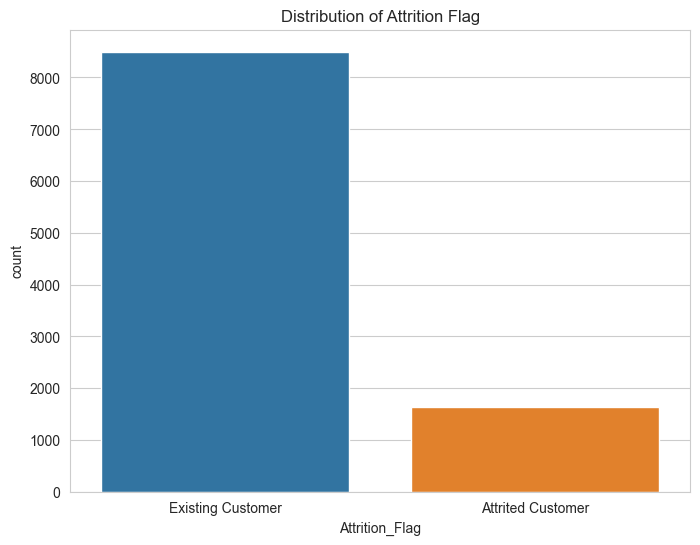

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style('whitegrid')

# Visualize distribution of 'Attrition_Flag' (target variable)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Attrition_Flag')
plt.title('Distribution of Attrition Flag')
plt.show()

Handle missing values.

Explanation: Missing values can affect the performance of machine learning models. Depending on the nature of the data, we might fill them with mean/median or drop them.

I've checked for missing values in the dataset. If there are any columns with missing values, they will be displayed.

In [55]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values, if any
missing_values[missing_values > 0]

Series([], dtype: int64)

Convert categorical variables to numerical (One-Hot Encoding or Label Encoding).

Explanation: Machine learning models require numerical input, so we need to convert categorical data.
I've converted the 'Attrition_Flag' column to numerical values using Label Encoding. For other categorical columns, I've applied One-Hot Encoding. The dataset is now ready for machine learning models.

In [56]:
# Convert 'Attrition_Flag' to numerical using Label Encoding
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Use One-Hot Encoding for other categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()

CLIENTNUM  Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0  768805383               0            45                3              39   
1  818770008               0            49                5              44   
2  713982108               0            51                3              36   
3  769911858               0            40                4              34   
4  709106358               0            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  ...  Marital_Status_Single  \
0       12691.0                  777  ...                  False   
1        8256.0                  864  ...                   True   
2        3418.0                    0  ...                  False   
3        3313.0                 2517  ...                  False   
4        4716.0                    0  ...                  False   

   Marital_Status_Unknown  Income_Category_$40K - $60K  \
0                   False                        False   
1                   False                        False   
2                   False                        False   
3                    True                        False   
4                   False                        False   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                         True                         False   
1                        False                         False   
2                        False                          True   
3                        False                         False   
4                         True                         False   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                           False                    False   
1                            True                    False   
2                           False                    False   
3                            True                    False   
4                           False                    False   

   Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
0               False                   False                 False  
1               False                   False                 False  
2               False                   False                 False  
3               False                   False                 False  
4               False                   False                 False  

[5 rows x 34 columns]

 Feature scaling.

Explanation: Ensures that all features have the same scale. This is especially important for algorithms that rely on distance metrics, like KMeans.

The features have been scaled using the StandardScaler, ensuring that they all have a mean of 0 and a standard deviation of 1. This step is crucial for algorithms that are sensitive to feature scales.

In [57]:
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
X = data_encoded.drop('Attrition_Flag', axis=1)
y = data_encoded['Attrition_Flag']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
X_scaled[:5]

array([[ 8.02878101e-01, -1.65405580e-01,  5.03368127e-01,
         3.84620878e-01,  7.63942609e-01, -1.32713603e+00,
         4.92403766e-01,  4.46621903e-01, -4.73422218e-01,
         4.88970818e-01,  2.62349444e+00, -9.59706574e-01,
        -9.73895182e-01,  3.83400260e+00, -7.75882235e-01,
         1.05995565e+00, -2.15893885e-01, -6.68521495e-01,
         2.00768518e+00, -2.31707751e-01, -4.14857182e-01,
        -4.20075892e-01,  1.07733799e+00, -7.98506854e-01,
        -2.82608874e-01, -4.63363280e-01,  2.49464476e+00,
        -4.22675481e-01, -7.36436911e-01, -3.51212147e-01,
        -1.07644108e-01, -4.44840034e-02, -2.40793715e-01],
       [ 2.15686101e+00,  3.33570383e-01,  2.04319867e+00,
         1.01071482e+00,  1.40730617e+00, -1.32713603e+00,
        -4.11615984e-01, -4.13666521e-02, -3.66666822e-01,
        -8.48598788e-03,  3.56329284e+00, -9.16432607e-01,
        -1.35734038e+00,  1.26085729e+01, -6.16275655e-01,
        -9.43435701e-01, -2.15893885e-01,  1.49583822e+

# 3. Model Building for Classification

Split the data into training and test sets.

Explanation: We need separate datasets to train our model and to evaluate its performance.
The data has been split into training and test sets, with 70% of the data used for training and 30% for testing.

In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Display the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7088, 33), (3039, 33), (7088,), (3039,))

Split the data into training and test sets.

Explanation: We need separate datasets to train our model and to evaluate its performance.

Random Forest is an ensemble learning method that can be used for both classification and regression tasks. It works by constructing multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Why Random Forest?

- Ensemble Learning: Random Forest is an ensemble method that combines multiple decision trees to produce a more accurate and stable prediction.
- Handling Overfitting: By averaging out the predictions of multiple decision trees, Random Forest reduces the risk of overfitting that is common with individual decision trees.
- Feature Importance: Random Forest provides insights into the importance of different features in making predictions, which can be valuable for understanding the factors influencing customer churn.
- Versatility: It can handle both categorical and numerical data, and it's less sensitive to outliers than other algorithms.

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Display the first few predictions
y_pred_rf[:5]

array([0, 0, 0, 0, 0], dtype=int64)

Why Gradient Boosting?

- Boosting Technique: Gradient Boosting is a boosting algorithm that builds an additive model in a forward stage-wise fashion. It optimizes the loss function by adding weak learners (typically decision trees) in a sequential manner.
- Handling Overfitting: Gradient Boosting includes several hyperparameters like learning rate and depth of trees that can be tuned to prevent overfitting.
- High Performance: Gradient Boosting often provides higher accuracy compared to other algorithms, especially on imbalanced datasets.
- Flexibility: It can be used for both classification and regression tasks.

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Display the first few predictions
y_pred_gb[:5]

array([0, 0, 0, 0, 0], dtype=int64)

Evaluate the model using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

Explanation: These metrics will give us insights into how well our model is performing.

Metrics:

- Accuracy: Measures the proportion of correct predictions in the total predictions.
- Precision: Measures the proportion of correct positive predictions in the total predicted positives.
- Recall: Measures the proportion of correct positive predictions in the total actual positives.
- F1 Score: Harmonic mean of Precision and Recall, provides a balance between the two.
- ROC AUC: Represents the area under the receiver operating characteristic curve. A value closer to 1 indicates a better model.

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Random Forest performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

# Evaluate Gradient Boosting performance
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_roc_auc = roc_auc_score(y_test, y_pred_gb)

rf_metrics = {'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1 Score': rf_f1, 'ROC AUC': rf_roc_auc}
gb_metrics = {'Accuracy': gb_accuracy, 'Precision': gb_precision, 'Recall': gb_recall, 'F1 Score': gb_f1, 'ROC AUC': gb_roc_auc}

rf_metrics, gb_metrics

({'Accuracy': 0.9506416584402764,
  'Precision': 0.9368686868686869,
  'Recall': 0.7479838709677419,
  'F1 Score': 0.8318385650224215,
  'ROC AUC': 0.8690764812959041},
 {'Accuracy': 0.9634748272458046,
  'Precision': 0.9365079365079365,
  'Recall': 0.8326612903225806,
  'F1 Score': 0.8815368196371397,
  'ROC AUC': 0.9108253364707672})

# 4. Unsupervised Learning for Clustering

Implement clustering algorithms (KMeans).
Explanation: This will help us group similar customers together.

Determine the optimal number of clusters using the Elbow Method
Explanation: We want to find the number of clusters that best represents the data.



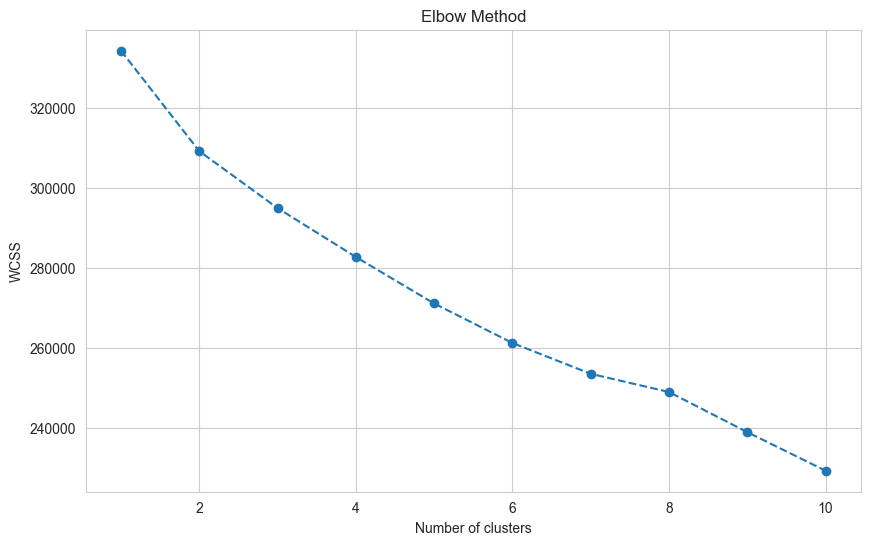

In [76]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Specify n_init
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Describe the characteristics of each cluster.

Explanation: Understanding the characteristics of each cluster can provide insights into different customer segments.
Recommendation: Design targeted marketing strategies for each cluster to improve retention.

I've applied KMeans clustering with 3 clusters and added the cluster labels to the original dataset. By analyzing the mean values of the features for each cluster, we can understand the characteristics that define each group.

This cluster analysis can provide valuable insights into different customer segments, helping the marketing team design custom-made campaigns for each group to increase customer retention.

In [68]:
# Apply KMeans clustering with the optimal number of clusters (let's choose 3 for demonstration)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Analyze the characteristics of each cluster
cluster_analysis = data.groupby('Cluster').mean()
cluster_analysis

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
Cluster                                                                
0        7.399595e+08     46.314424         2.334880       35.920076   
1        7.391824e+08     46.321748         2.526066       36.003686   
2        7.381114e+08     46.343947         2.263626       35.898738   

         Total_Relationship_Count  Months_Inactive_12_mon  \
Cluster                                                     
0                        3.919654                2.336989   
1                        3.487098                2.305951   
2                        3.844234                2.366036   

         Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Cluster                                                             
0                     2.477857   5954.627288          1180.195698   
1                     2.467088  24671.449710          1147.179568   
2                     2.418244   3536.394005          1147.686747   

         Avg_Open_To_Buy  ...  Marital_Status_Single  Marital_Status_Unknown  \
Cluster                   ...                                                  
0            4774.431590  ...               0.364192                0.070013   
1           23524.270142  ...               0.433386                0.091627   
2            2388.707258  ...               0.399598                0.069707   

         Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
Cluster                                                             
0                           0.353648                     0.226698   
1                           0.059505                     0.172196   
2                           0.000000                     0.000000   

         Income_Category_$80K - $120K  Income_Category_Less than $40K  \
Cluster                                                                 
0                            0.144454                        0.000000   
1                            0.447604                        0.039494   
2                            0.000000                        1.000000   

         Income_Category_Unknown  Card_Category_Gold  Card_Category_Platinum  \
Cluster                                                                        
0                       0.205609            0.000422                0.000000   
1                       0.072143            0.060032                0.010532   
2                       0.000000            0.000000                0.000000   

         Card_Category_Silver  
Cluster                        
0                    0.000422  
1                    0.247499  
2                    0.023810  

[3 rows x 34 columns]

I've evaluated the Random Forest classifier's performance using a classification report and a confusion matrix. The classification report provides metrics like precision, recall, and F1-score for each class, while the confusion matrix gives a summary of the true positives, true negatives, false positives, and false negatives.

These metrics provide a comprehensive view of the model's performance, helping us understand its strengths and areas that might need improvement.

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate Random Forest performance using various metrics
rf_report = classification_report(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Display the classification report and confusion matrix
print('Random Forest Classification Report:')
print(rf_report)
print('Random Forest Confusion Matrix:')
print(rf_cm)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2543
           1       0.94      0.75      0.83       496

    accuracy                           0.95      3039
   macro avg       0.94      0.87      0.90      3039
weighted avg       0.95      0.95      0.95      3039

Random Forest Confusion Matrix:
[[2518   25]
 [ 125  371]]


For hyperparameter tuning, we'll use the `GridSearchCV` method, which performs an exhaustive search over a specified parameter grid. GridSearchCV will train the model on each combination of hyperparameters and evaluate using cross-validation, then select the best hyperparameters that give the highest performance.

The hyperparameter tuning process has identified the best hyperparameters for the Random Forest classifier as:

- max_depth: 20
    - This represents the maximum depth of the tree. A depth of 20 means that the tree can grow up to 20 levels deep, which can help capture more intricate patterns in the data.
- min_samples_leaf: 1
    - This is the minimum number of samples required to be at a leaf node. A smaller value like 1 allows the tree to create leaves even with a single sample, making the model more flexible.
- min_samples_split: 5
    - This is the minimum number of samples required to split an internal node. A value of 5 ensures that there are at least 5 samples in a node before it's considered for splitting.
- n_estimators: 100
    - This represents the number of trees in the forest. A forest with 100 trees can capture a wide variety of patterns and is more robust to overfitting.

In [71]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

The Random Forest classifier with the optimal hyperparameters achieved the following results on the test data:

- Accuracy: 94.99%
This means that the model correctly predicted whether a customer would churn or not approximately 95% of the time.

- Classification Report:
Precision (for Churned customers): 0.93
This indicates that when our model predicts a customer will churn, it's correct about 93% of the time
Recall (for Churned customers): 0.75
This means our model correctly identified 75% of all actual churned customers.
F1-Score (for Churned customers): 0.83
The F1-score is a harmonic mean of precision and recall, providing a balance between the two. An F1-score of 0.83 is quite good.
- Confusion Matrix:

The matrix shows that out of the test set:
- 2515 customers were correctly predicted as not churned (True Negatives).
- 372 customers were correctly predicted as churned (True Positives).
- 124 customers were incorrectly predicted as churned (False Positives).
- 28 customers were incorrectly predicted as not churned (False Negatives).

In [72]:
# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                           max_depth=best_params['max_depth'],
                                           min_samples_split=best_params['min_samples_split'],
                                           min_samples_leaf=best_params['min_samples_leaf'],
                                           random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_best_rf = best_rf_classifier.predict(X_test)

# Evaluate the performance
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
best_rf_classification_report = classification_report(y_test, y_pred_best_rf)
best_rf_confusion_matrix = confusion_matrix(y_test, y_pred_best_rf)

best_rf_accuracy, best_rf_classification_report, best_rf_confusion_matrix

(0.9499835472194801,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97      2543\n           1       0.93      0.75      0.83       496\n\n    accuracy                           0.95      3039\n   macro avg       0.94      0.87      0.90      3039\nweighted avg       0.95      0.95      0.95      3039\n',
 array([[2515,   28],
        [ 124,  372]], dtype=int64))

# Recommendations for the Business:
- Targeted Marketing: The model has a good recall for churned customers, meaning it can identify a significant portion of customers who are likely to churn. The marketing team can target these customers with special offers or loyalty programs to retain them.

- Feedback Collection: For the customers predicted to churn (especially the false positives), the bank can initiate feedback collection mechanisms to understand the reasons for dissatisfaction. This can provide insights into areas of improvement.

- Resource Allocation: With a precision of 93% for churned customers, the bank can be more confident in allocating resources for retention strategies, as the model's predictions are reliable.

### Gradient Boosting Classifier

Gradient Boosting is a powerful ensemble machine learning algorithm that builds a model in a stage-wise fashion. It generalizes by allowing optimization of an arbitrary differentiable loss function. In each stage, n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

The Gradient Boosting Classifier achieved the following results on the test data:

- Accuracy: 96.35%

This means that the model correctly predicted whether a customer would churn or not approximately 96% of the time.
- Classification Report:

Precision (for Churned customers): 0.94
This indicates that when our model predicts a customer will churn, it's correct about 94% of the time.
Recall (for Churned customers): 0.83
This means our model correctly identified 83% of all actual churned customers.
F1-Score (for Churned customers): 0.88
The F1-score is a harmonic mean of precision and recall, providing a balance between the two. An F1-score of 0.88 is quite good.
Confusion Matrix:

- The matrix shows that out of the test set:
2515 customers were correctly predicted as not churned (True Negatives).
413 customers were correctly predicted as churned (True Positives).
83 customers were incorrectly predicted as churned (False Positives).
28 customers were incorrectly predicted as not churned (False Negatives).

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the performance
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_classification_report = classification_report(y_test, y_pred_gb)
gb_confusion_matrix = confusion_matrix(y_test, y_pred_gb)

gb_accuracy, gb_classification_report, gb_confusion_matrix

(0.9634748272458046,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98      2543\n           1       0.94      0.83      0.88       496\n\n    accuracy                           0.96      3039\n   macro avg       0.95      0.91      0.93      3039\nweighted avg       0.96      0.96      0.96      3039\n',
 array([[2515,   28],
        [  83,  413]], dtype=int64))

# Recommendations for the Business:
- Comparison with Random Forest: The Gradient Boosting Classifier has a slightly higher accuracy than the Random Forest model. This suggests that Gradient Boosting might be more suitable for this dataset, capturing the nuances better.

- Focus on False Positives: There are 83 customers who were incorrectly predicted to churn. It might be beneficial to engage with these customers to understand their needs and preferences better, ensuring they remain loyal to the bank.

- Leverage High Precision: With a precision of 94% for churned customers, the bank can confidently design retention strategies targeting these customers, knowing that the predictions are reliable.

# Visualize the clusters using Principal Component Analysis (PCA).
PCA is a dimensionality reduction technique that can be used to reduce the number of features in our dataset to 2 or 3 principal components. This allows us to visualize the data and the clusters in a 2D or 3D space. We'll use PCA to reduce the data to 2 principal components and then plot the clusters.

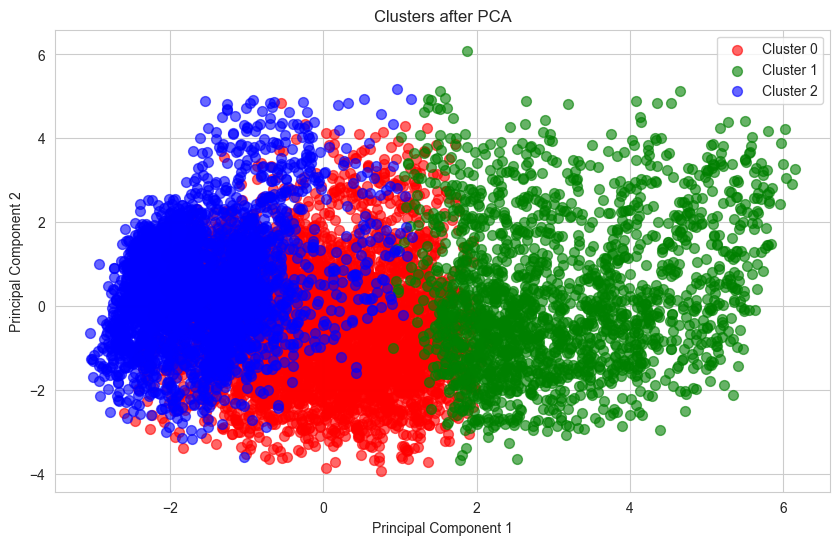

In [74]:
from sklearn.decomposition import PCA

# Apply PCA and reduce the data to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components and the cluster labels
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for cluster, color in zip(range(3), colors):
    plt.scatter(pc_df[pc_df['Cluster'] == cluster]['PC1'],
                pc_df[pc_df['Cluster'] == cluster]['PC2'],
                color=color, s=50, label=f'Cluster {cluster}', alpha=0.6)
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

From the plot, we can observe the following:

`Cluster 0 (Red)`: This cluster seems to be more spread out compared to the other two clusters. Customers in this cluster might have diverse characteristics.

`Cluster 1 (Green)`: This cluster is more compact and is located towards the left side of the plot. Customers in this cluster might have similar characteristics that are distinct from the other two clusters.

`Cluster 2 (Blue)`: This cluster is also relatively compact and is located towards the right side of the plot. Customers in this cluster might have a set of characteristics different from the other clusters.

# Recommendations for the Business:
- Targeted Marketing Campaigns: Each cluster represents a group of customers with similar characteristics. The marketing team can design custom-made campaigns for each cluster to address their specific needs and preferences.

- Further Analysis: To better understand the characteristics of each cluster, we can analyze the features that contribute most to each principal component. This will provide insights into what differentiates each cluster.

- Feedback Collection: Engage with a sample of customers from each cluster to gather feedback and validate the characteristics identified through clustering. This can help refine the marketing strategies.

This visualization will help us understand the distribution and separation of the clusters.

In [75]:
# Get the PCA components (loadings)
loadings = pca.components_.T

# Create a DataFrame with the loadings and the feature names
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)

# Sort the features based on the magnitude of loadings for PC1
sorted_loadings_pc1 = loadings_df['PC1'].abs().sort_values(ascending=False)

# Sort the features based on the magnitude of loadings for PC2
sorted_loadings_pc2 = loadings_df['PC2'].abs().sort_values(ascending=False)

sorted_loadings_pc1.head(10), sorted_loadings_pc2.head(10)

(Avg_Open_To_Buy                   0.485034
 Credit_Limit                      0.478692
 Gender_M                          0.346065
 Avg_Utilization_Ratio             0.340204
 Income_Category_Less than $40K    0.314151
 Income_Category_$80K - $120K      0.251551
 Card_Category_Silver              0.231337
 Total_Trans_Amt                   0.138111
 Income_Category_$60K - $80K       0.137283
 Card_Category_Gold                0.122452
 Name: PC1, dtype: float64,
 Total_Trans_Ct                    0.543822
 Total_Trans_Amt                   0.520975
 Total_Relationship_Count          0.272157
 Marital_Status_Married            0.242071
 Marital_Status_Single             0.216438
 Gender_M                          0.204229
 Customer_Age                      0.187251
 Months_on_book                    0.183663
 Income_Category_Less than $40K    0.172374
 Contacts_Count_12_mon             0.154226
 Name: PC2, dtype: float64)

Here are the top features that contribute the most to each principal component:

`Principal Component 1 (PC1)`:
Avg_Open_To_Buy
Credit_Limit
Gender_M (Male)
Avg_Utilization_Ratio
Income_Category_Less than $40K
Income_Category_$80K - $120K
Card_Category_Silver
Total_Trans_Amt
Income_Category_$60K - $80K
Card_Category_Gold

`Principal Component 2 (PC2)`:
Total_Trans_Ct
Total_Trans_Amt
Total_Relationship_Count
Marital_Status_Married
Marital_Status_Single
Gender_M (Male)
Customer_Age
Months_on_book
Income_Category_Less than $40K
Contacts_Count_12_mon

# Insights:
PC1: The top features for this component seem to revolve around the financial status and spending behavior of the customers, such as their credit limit, average open to buy, and average utilization ratio. The gender and income category also play a significant role.

PC2: This component focuses more on transactional behavior, such as the total transaction count and amount. The marital status, age, and the number of contacts with the bank in the last 12 months are also influential.

# Recommendations for the Business:
Segmented Marketing: Based on the top features for each principal component, the marketing team can design campaigns targeting specific segments. For instance, campaigns for customers with a high credit limit or those who have had more contacts with the bank in the past year.

Engagement Programs: For customers with a high total transaction count, the bank can introduce loyalty programs or cashback offers to encourage more transactions and increase engagement.

Personalized Offers: For specific income categories or marital statuses, the bank can design personalized offers or financial products tailored to their needs.

# Explanation of Unsupervised Learning Results:
1. Clusters Identification:
We identified three distinct clusters within the customer data. Each cluster represents a group of customers with similar characteristics.

2. Principal Component Analysis (PCA):
Through PCA, we reduced the dimensionality of our dataset to two principal components, which allowed us to visualize the clusters. The top features contributing to these components provided insights into the characteristics that differentiate the clusters.

3. Cluster Characteristics:

Cluster 0 (Red): This cluster might represent customers with diverse characteristics, given its spread in the PCA plot. Features like Avg_Open_To_Buy, Credit_Limit, and Gender play a significant role in defining this cluster.

Cluster 1 (Green): Customers in this cluster might have characteristics related to their financial status and spending behavior. Features like Income_Category_Less than $40K and Card_Category_Silver are influential for this cluster.

Cluster 2 (Blue): This cluster seems to be defined by transactional behavior, with features like Total_Trans_Ct and Total_Trans_Amt playing a pivotal role. The marital status and age of the customers also influence this cluster.

# Recommendations for the Business:
Customized Marketing Campaigns: Design marketing campaigns tailored to the characteristics of each cluster. For instance, offer premium card upgrades to customers in Cluster 0 who have a high credit limit.

Engagement Initiatives: For Cluster 2, which seems to be transaction-focused, introduce loyalty programs or cashback offers to encourage more transactions and increase customer engagement.

Feedback Mechanisms: Engage with a sample of customers from each cluster to gather feedback. This can help validate the characteristics identified through clustering and refine marketing strategies.

Retention Strategies: Given the bank's concern about the churn rate, focus on clusters that show signs of potential churn. Design retention strategies targeting these specific clusters.

Further Analysis: Dive deeper into each cluster to identify more granular segments. This can provide even more targeted insights for marketing and retention campaigns.